In this exercise, we aim to train a deep neural network using the Keras framework to assist the French national team's goalkeeper in successfully throwing the ball to the center of the field. However, our neural network is large, and our dataset is small! As a result, the network tends to overfit under normal conditions. But we won’t give up—we will try to prevent overfitting using the regularization techniques we have learned, ensuring the best possible assistance for the goalkeeper.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_train_x = np.load('/home/melika_yazdanpanah/new_home/goalkeeper (1)/goalkeeper/data/data_X.npy')
data_train_y = np.load('data/data_y.npy')
data_eval_x = np.load('data/data_Xval.npy')
data_eval_y = np.load('data/data_yval.npy')

print(data_train_x.shape, data_train_y.shape, data_eval_x.shape, data_eval_y.shape)

(211, 2) (211, 1) (200, 2) (200, 1)


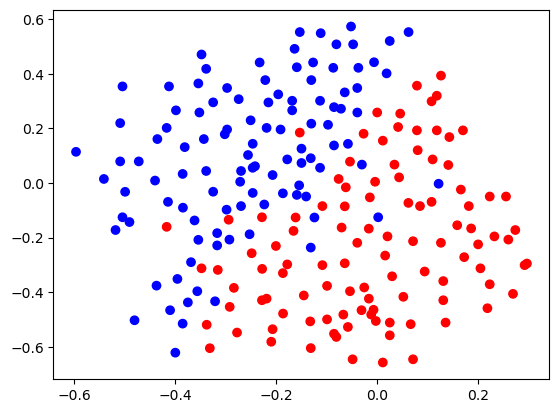

In [2]:
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors)

In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [4]:
import keras

model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(5000, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

2025-03-30 11:41:26.734431: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-30 11:41:26.748875: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-30 11:41:26.876525: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-30 11:41:27.009503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-30 11:41:27.135218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [5]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(data_train_x, data_train_y,
                    epochs=500, batch_size=32,
                    validation_data=(data_eval_x, data_eval_y))

Epoch 1/500


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.6526 - loss: 0.5385 - val_accuracy: 0.8450 - val_loss: 0.4811
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.8202 - loss: 0.4047 - val_accuracy: 0.9200 - val_loss: 0.2940
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.9087 - loss: 0.2523 - val_accuracy: 0.9000 - val_loss: 0.3397
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.8961 - loss: 0.2758 - val_accuracy: 0.9250 - val_loss: 0.2746
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.9440 - loss: 0.2329 - val_accuracy: 0.9350 - val_loss: 0.3129
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.9214 - loss: 0.2220 - val_accuracy: 0.9300 - val_loss: 0.2920
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.9193 - loss: 0.2537 - val_accuracy: 0.9300 - val_loss: 0.2678
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9231 - loss: 0.2325 - val_accuracy: 0.9150 - val_loss: 0.3

In [11]:
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(train_loss) + 1)
    
    fig, axs = plt.subplots(2, figsize=(10, 7))
    fig.suptitle('Training and Validation Metrics')
    
    # Loss plot
    axs[0].plot(epochs, train_loss, label='Training loss', c='red')
    axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].set_ylim([0, 1.5])
    
    # Accuracy plot
    axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
    axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

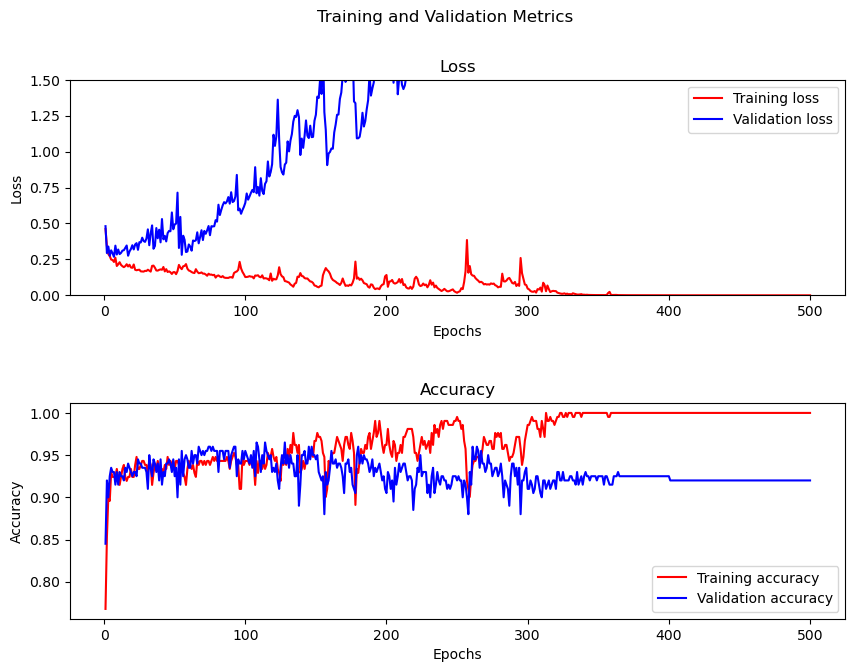

In [12]:
plot_loss_acc(history)

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

def get_decision_boundaries(model, xmin, xmax, ymin, ymax, steps):
  x_span = np.linspace(xmin, xmax, steps)
  y_span = np.linspace(ymin, ymax, steps)
  xx, yy = np.meshgrid(x_span, y_span)
  points = (np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32))

  z = (model.predict(np.c_[xx.ravel(), yy.ravel()])>0.5).reshape(xx.shape)

  return xx, yy, z

def plt_decision_boundaries(model, x_min, x_max, y_min, y_max, steps):
  plt.figure(figsize=(6, 4))
  xx, yy, z = get_decision_boundaries(model, x_min, x_max, y_min, y_max, steps)
  plt.contourf(xx, yy, z, alpha=0.2, cmap=matplotlib.colors.ListedColormap(["C1", "C0"]));


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


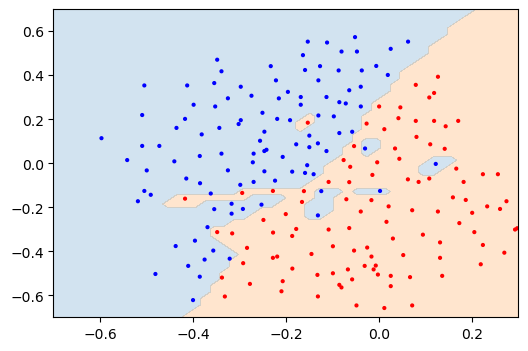

In [14]:
plt_decision_boundaries(model, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

In [16]:
from keras.layers import Dense, Dropout , Input

model_dropout = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu'),
    Dropout(0.6),
    keras.layers.Dense(5000, activation='relu'),
    Dropout(0.6),
    keras.layers.Dense(5000, activation='relu'),
    Dropout(0.6),
    keras.layers.Dense(1, activation='sigmoid')])

In [17]:
model_dropout.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model_dropout.fit(data_train_x, data_train_y,
                            epochs=500, batch_size=32,
                            validation_data=(data_eval_x, data_eval_y))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.6925 - loss: 0.5701 - val_accuracy: 0.9050 - val_loss: 0.4319
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.8979 - loss: 0.3607 - val_accuracy: 0.9300 - val_loss: 0.3332
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.8967 - loss: 0.3107 - val_accuracy: 0.9300 - val_loss: 0.2880
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - accuracy: 0.9296 - loss: 0.2033 - val_accuracy: 0.9300 - val_loss: 0.2907
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.9132 - loss: 0.2460 - val_accuracy: 0.9100 - val_loss: 0.3359
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.8991 - loss: 0.2456 - val_accuracy: 0.9100 - val_loss: 0.3147
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.9074 - loss: 0.2547 - val_accuracy: 0.9350 - val_loss: 0.2984
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.9349 - loss: 0.2150 - val_accuracy: 0.9250 - v

In [19]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

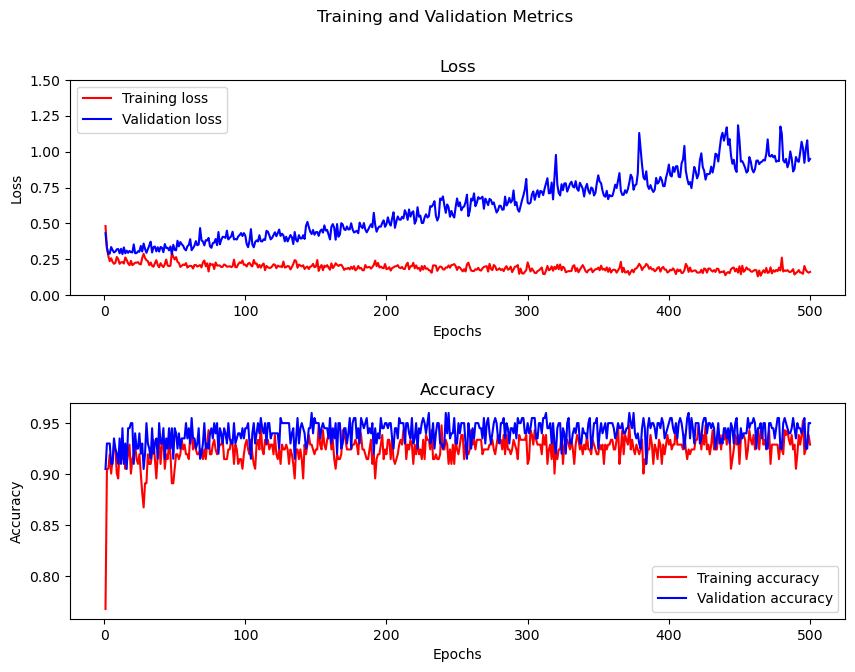

In [20]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


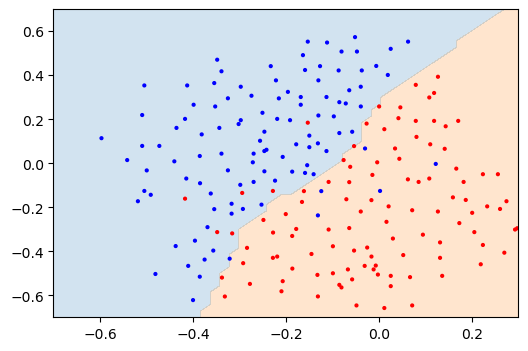

In [21]:
plt_decision_boundaries(model_dropout, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()

In [24]:
from keras import regularizers

l1_l2_reg = regularizers.L1L2(l1=3e-5, l2=3e-4) 

model_l1l2 = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=l1_l2_reg), # TODO: add L1L2 regularizer
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=l1_l2_reg), # TODO: add L1L2 regularizer
    keras.layers.Dense(5000, activation='relu', kernel_regularizer=l1_l2_reg), # TODO: add L1L2 regularizer
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l1_l2_reg) # TODO: add L1L2 regularizer
    ])

In [25]:
model_l1l2.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model_l1l2.fit(data_train_x, data_train_y,
                         epochs=500, batch_size=32,
                         validation_data=(data_eval_x, data_eval_y))

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 0.6909 - loss: 19.4566 - val_accuracy: 0.8650 - val_loss: 11.9465
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.8476 - loss: 10.2392 - val_accuracy: 0.8800 - val_loss: 5.6800
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 477ms/step - accuracy: 0.8971 - loss: 4.7969 - val_accuracy: 0.9250 - val_loss: 2.6605
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step - accuracy: 0.9202 - loss: 2.4140 - val_accuracy: 0.9250 - val_loss: 2.1035
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - accuracy: 0.9113 - loss: 1.9756 - val_accuracy: 0.9100 - val_loss: 1.4655
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - accuracy: 0.8881 - loss: 1.3589 - val_accuracy: 0.9350 - val_loss: 1.0245
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.8992 - loss: 1.0104 - val_accuracy: 0.9250 - val_loss: 0.7849
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.9138 - loss: 0.7848 - val_accuracy: 0.9300 

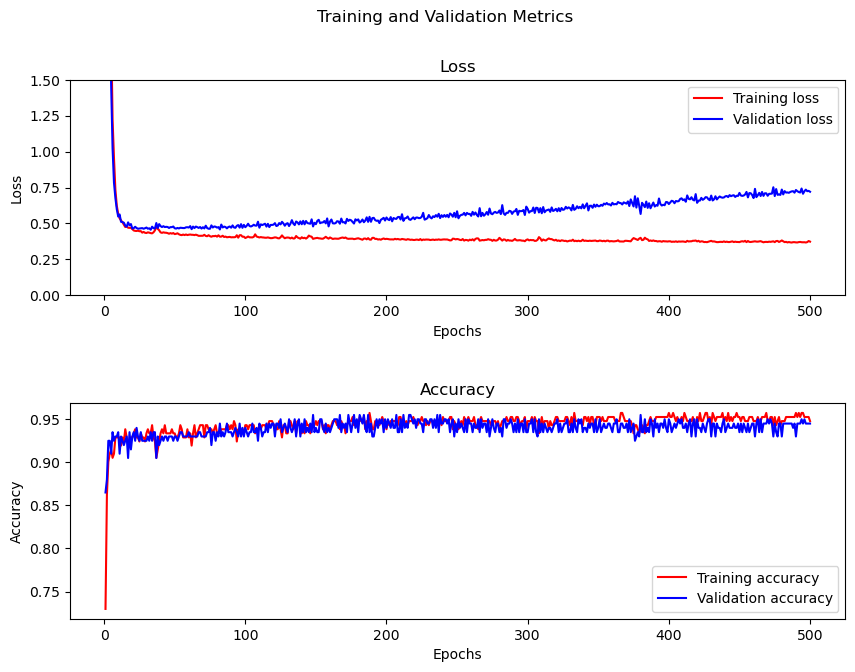

In [27]:
plot_loss_acc(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


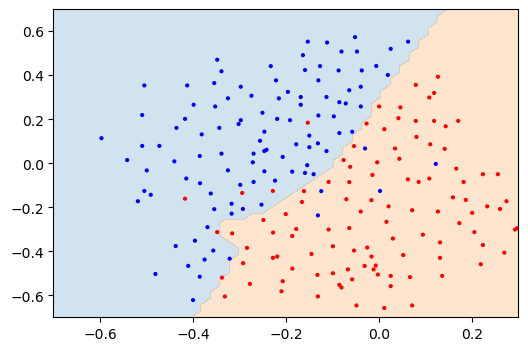

In [28]:
plt_decision_boundaries(model_l1l2, -0.7, 0.3, -0.7, 0.7, 50)
colors = ['red' if label == 0 else 'blue' for label in data_train_y.ravel()]
plt.scatter(data_train_x[:, 0], data_train_x[:, 1], c=colors, s=4)
plt.show()